<a href="https://colab.research.google.com/github/alka62/svm-classification/blob/main/Task7_SVM_BinaryClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

📂 Please upload your CSV or ZIP dataset file


Saving archive (1).zip to archive (1) (2).zip
✅ Uploaded file: archive (1) (2).zip
📂 Extracted files: ['breast-cancer.csv']
📄 Using CSV file: dataset/breast-cancer.csv

📊 Dataset Preview:
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           

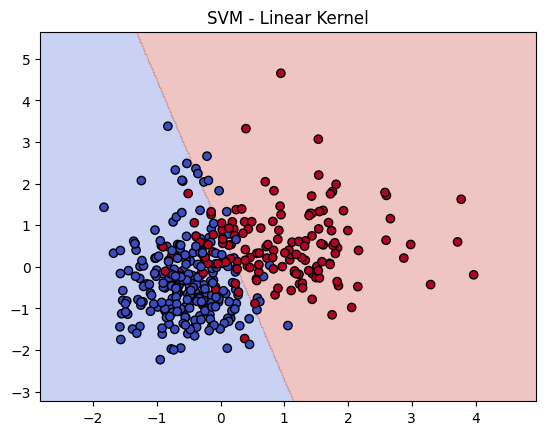

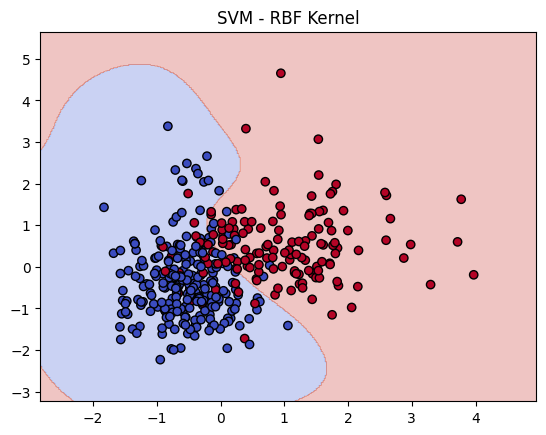


🏆 Best Parameters: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}

📈 Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.94      0.93       108
           1       0.90      0.84      0.87        63

    accuracy                           0.91       171
   macro avg       0.90      0.89      0.90       171
weighted avg       0.91      0.91      0.91       171


📊 Confusion Matrix:


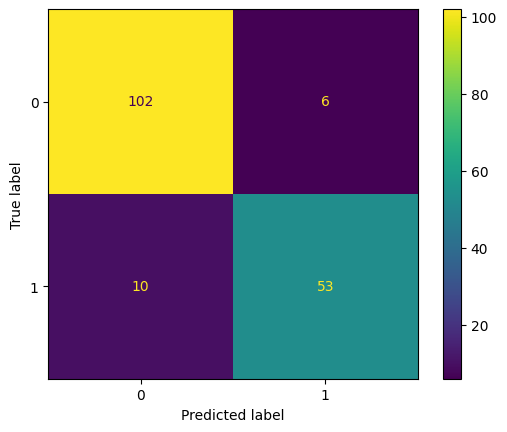

In [4]:
# Task 7: Support Vector Machines (SVM) with File Upload in Colab

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import zipfile, os

# ==============================
# 1. FILE UPLOAD (WILL ASK IMMEDIATELY)
# ==============================
from google.colab import files

print("📂 Please upload your CSV or ZIP dataset file")
uploaded = files.upload()

file_name = list(uploaded.keys())[0]  # Get file name
print(f"✅ Uploaded file: {file_name}")

# ==============================
# 2. IF ZIP, EXTRACT CSV
# ==============================
if file_name.endswith(".zip"):
    with zipfile.ZipFile(file_name, 'r') as zip_ref:
        zip_ref.extractall("dataset")
    files_in_zip = os.listdir("dataset")
    print("📂 Extracted files:", files_in_zip)
    csv_files = [f for f in files_in_zip if f.endswith(".csv")]
    if not csv_files:
        raise Exception("❌ No CSV file found inside ZIP")
    csv_path = os.path.join("dataset", csv_files[0])
else:
    csv_path = file_name

print(f"📄 Using CSV file: {csv_path}")

# ==============================
# 3. LOAD DATA
# ==============================
df = pd.read_csv(csv_path)
print("\n📊 Dataset Preview:")
print(df.head())

# Guess target column (last column)
target_col = df.columns[-1]

# Correctly identify the target column for the breast cancer dataset
# Assuming the target column is 'diagnosis' based on the preview
if 'diagnosis' in df.columns:
    target_col = 'diagnosis'
else:
    # Fallback to the last column if 'diagnosis' is not found
    target_col = df.columns[-1]


print(f"\n🎯 Detected target column: {target_col}")

# Drop the target column and the 'id' column from features
X = df.drop([target_col, 'id'], axis=1).values
y = df[target_col].values

# Encode labels if needed
if y.dtype == object:
    y = LabelEncoder().fit_transform(y)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Take first 2 features for visualization
# Since we dropped 'id' and 'diagnosis', the first two numerical features should be used
X_vis = X_scaled[:, :2]


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_vis, y, test_size=0.3, random_state=42
)

# ==============================
# 4. TRAIN SVM MODELS
# ==============================
linear_svm = SVC(kernel='linear', C=1)
linear_svm.fit(X_train, y_train)

rbf_svm = SVC(kernel='rbf', C=1, gamma=0.7)
rbf_svm.fit(X_train, y_train)

# ==============================
# 5. VISUALIZATION FUNCTION
# ==============================
def plot_decision_boundary(model, X, y, title):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
    plt.title(title)
    plt.show()

plot_decision_boundary(linear_svm, X_train, y_train, "SVM - Linear Kernel")
plot_decision_boundary(rbf_svm, X_train, y_train, "SVM - RBF Kernel")

# ==============================
# 6. HYPERPARAMETER TUNING
# ==============================
param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['rbf']}
grid = GridSearchCV(SVC(), param_grid, cv=5)
grid.fit(X_train, y_train)

print("\n🏆 Best Parameters:", grid.best_params_)

# ==============================
# 7. EVALUATION
# ==============================
y_pred = grid.predict(X_test)
print("\n📈 Classification Report:\n", classification_report(y_test, y_pred))
print("\n📊 Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()